# A comparison of machine learning techniques.

In [69]:
import os
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from data_cleaner import DataCleaner
from deep_learning import DeepLearning

In [70]:
input_folder1 = "Data/MegaData"  # Path to the folder containing CSV files

# Initialize the DataCleaner with folder path and output file
cleaner1 = DataCleaner(input_folder1, cleaning_method='IQR')
cleanedData1 = cleaner1.clean_data()  # Call the cleaning function

Processing file: robertson_chardonnay_2015_0410_r1.csv
Original number of rows: 15000
Rows after dropping nulls: 15000
Rows after removing NaNs from sensor columns: 15000
Total rows cleaned: 0
____________________
Processing file: Shir_Shiraz_2023_R3_1510_20degEnvTemp_convlab.csv
Original number of rows: 15000
Rows after dropping nulls: 15000
Rows after removing NaNs from sensor columns: 15000
Total rows cleaned: 0
____________________
Processing file: sophie_0410_r1.csv
Original number of rows: 15000
Rows after dropping nulls: 15000
Rows after removing NaNs from sensor columns: 15000
Total rows cleaned: 0
____________________
Processing file: woolies_cabsav_2023_1010_20degEnvTemp_BoimedLab.csv
Original number of rows: 15000
Rows after dropping nulls: 15000
Rows after removing NaNs from sensor columns: 15000
Total rows cleaned: 0
____________________
Data cleaning complete. Rows in cleaned data: 60000


In [71]:
cleanedData1.head()

,yyyy-mm-dd timestamp,MQ6,MQ5,MQ4,MQ7,MQ3,MQ8,MQ2,MQ135,MQ9,BMPTemperature,Pressure(Pa),DHTTemperature,Humidity,Target
0,2024-10-04 14:17:15,570,814,709,457,859,735,759,834,792,31.87,84398.22,0.0,0.0,robertson
1,2024-10-04 14:17:15,569,814,709,457,860,735,759,834,792,31.88,84335.99,34.0,81.0,robertson
2,2024-10-04 14:17:15,569,814,709,457,859,729,755,832,791,31.88,84335.99,34.0,81.0,robertson
3,2024-10-04 14:17:15,570,814,709,457,859,735,759,834,792,31.87,84348.63,34.0,81.0,robertson
4,2024-10-04 14:17:15,569,814,709,457,859,735,759,834,792,31.87,84348.63,34.0,81.0,robertson


In [72]:
cleanedData1 = cleanedData1[(cleanedData1 != 0).all(axis=1)]

cleanedData1.head()

,yyyy-mm-dd timestamp,MQ6,MQ5,MQ4,MQ7,MQ3,MQ8,MQ2,MQ135,MQ9,BMPTemperature,Pressure(Pa),DHTTemperature,Humidity,Target
1,2024-10-04 14:17:15,569,814,709,457,860,735,759,834,792,31.88,84335.99,34.0,81.0,robertson
2,2024-10-04 14:17:15,569,814,709,457,859,729,755,832,791,31.88,84335.99,34.0,81.0,robertson
3,2024-10-04 14:17:15,570,814,709,457,859,735,759,834,792,31.87,84348.63,34.0,81.0,robertson
4,2024-10-04 14:17:15,569,814,709,457,859,735,759,834,792,31.87,84348.63,34.0,81.0,robertson
5,2024-10-04 14:17:15,570,814,709,457,859,735,759,834,792,31.87,84379.49,34.0,81.0,robertson


In [73]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Assume cleanedData1 is the original data before scaling
df = pd.DataFrame(cleanedData1)

# Save the 'Target' column before dropping it
target_column = df['Target']

# Drop the timestamp and 'Target' columns
df = df.drop(columns=['yyyy-mm-dd timestamp', 'Target'])

# Scale the feature data
scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Scaled data with the 'Target' column added back
print("Dataframe to be used for further modeling:")
scaled_df.head()

Dataframe to be used for further modeling:


,MQ6,MQ5,MQ4,MQ7,MQ3,MQ8,MQ2,MQ135,MQ9,BMPTemperature,Pressure(Pa),DHTTemperature,Humidity
0,1.743033,0.656292,0.864621,0.230536,0.194032,1.171485,0.639464,1.007363,-0.381245,-0.205380,0.112297,-0.163911,-0.372966
1,1.743033,0.656292,0.864621,0.230536,0.172525,1.003841,0.488422,0.969163,-0.408816,-0.205380,0.112297,-0.163911,-0.372966
2,1.765143,0.656292,0.864621,0.230536,0.172525,1.171485,0.639464,1.007363,-0.381245,-0.213987,0.133105,-0.163911,-0.372966
3,1.743033,0.656292,0.864621,0.230536,0.172525,1.171485,0.639464,1.007363,-0.381245,-0.213987,0.133105,-0.163911,-0.372966
4,1.765143,0.656292,0.864621,0.230536,0.172525,1.171485,0.639464,1.007363,-0.381245,-0.213987,0.183906,-0.163911,-0.372966


In [74]:
from sklearn.decomposition import PCA

#Initiating PCA to reduce dimentions aka features to 3
pca = PCA(n_components=3)
pca.fit(scaled_df)
PCA_df = pd.DataFrame(pca.transform(scaled_df), columns=(["col1","col2", "col3"]))
PCA_df.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,59999.0,-6.063399e-17,2.811986,-4.083902,-1.974661,-0.615981,2.353702,5.372000
col2,59999.0,6.063399e-17,1.504811,-2.515495,-1.301812,-0.222203,1.402075,2.834113
col3,59999.0,2.273775e-17,1.111438,-1.667593,-0.803750,-0.355624,0.402329,2.159586


In [75]:
# Add the 'Target' column back to the scaled data
PCA_df['Target'] = target_column.values
PCA_df.head()

,col1,col2,col3,Target
0,0.815151,0.999382,1.634056,robertson
1,0.707101,0.895511,1.640967,robertson
2,0.814842,0.993157,1.648428,robertson
3,0.815400,0.987761,1.630409,robertson
4,0.809905,0.994209,1.636997,robertson


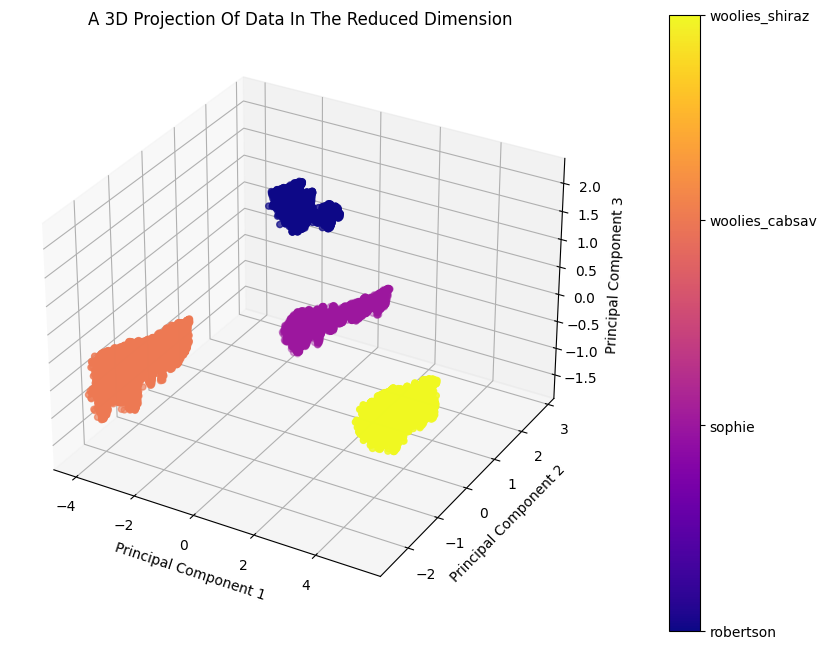

In [76]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Assuming PCA_df contains the principal components and the 'Target' column
x = PCA_df["col1"]
y = PCA_df["col2"]
z = PCA_df["col3"]

# Encode 'Target' wine bottle names into numerical values for color mapping
label_encoder = LabelEncoder()
encoded_target = label_encoder.fit_transform(PCA_df['Target'])  # Encode wine names into integers

# Create the 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection="3d")

# Scatter plot with different colors based on the 'Target' wine bottle name
scatter = ax.scatter(x, y, z, c=encoded_target, cmap='plasma', marker="o")

# Add a colorbar and set labels to the original wine names
cbar = fig.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_ticks(np.arange(len(label_encoder.classes_)))
cbar.set_ticklabels(label_encoder.classes_)  # Display wine names on the colorbar

# Set title and axis labels
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")

# Show the plot
plt.show()


Now lets add the other wine set to the data.

Remember to drop the old sophie file.

In [77]:
input_folder2 = "Data/02.10.2024/"  # Path to the folder containing CSV files

# Initialize the DataCleaner with folder path and output file
cleaner2 = DataCleaner(input_folder2, cleaning_method='z_score')
cleanedData2 = cleaner2.clean_data()  # Call the cleaning function

Processing file: blacktie_0210.csv
Original number of rows: 13645
Rows after dropping nulls: 13640
Rows after removing NaNs from sensor columns: 13640
Rows before: 13640, Rows cleaned after Z-Score: 418
Total rows cleaned: 423
____________________
Processing file: moscato_0210.csv
Original number of rows: 14171
Rows after dropping nulls: 14167
Rows after removing NaNs from sensor columns: 14167
Rows before: 14167, Rows cleaned after Z-Score: 118
Total rows cleaned: 122
____________________
Processing file: namaqua_0210.csv
Original number of rows: 15977
Rows after dropping nulls: 15976
Rows after removing NaNs from sensor columns: 15976
Rows before: 15976, Rows cleaned after Z-Score: 640
Total rows cleaned: 641
____________________
Processing file: SilverMyn_0210.csv
Original number of rows: 16206
Rows after dropping nulls: 16204
Rows after removing NaNs from sensor columns: 16202
Rows before: 16202, Rows cleaned after Z-Score: 478
Total rows cleaned: 482
____________________
Processin

In [78]:
cleanedData2.head()

,yyyy-mm-dd timestamp,MQ6,MQ5,MQ4,MQ7,MQ3,MQ8,MQ2,MQ135,MQ9,BMPTemperature,Pressure(Pa),DHTTemperature,Humidity,Target
0,2024-10-02 12:50:03,505.0,748,684.0,353,882,703,724,707,721.0,31.44,85497.75,33.0,77.0,blacktie
1,2024-10-02 12:50:03,505.0,748,684.0,354,882,698,721,706,720.0,31.44,85497.75,33.0,77.0,blacktie
2,2024-10-02 12:50:03,505.0,748,684.0,354,882,704,724,707,721.0,31.44,85532.28,33.0,77.0,blacktie
3,2024-10-02 12:50:03,505.0,748,683.0,354,882,704,725,708,721.0,31.44,85532.28,33.0,77.0,blacktie
4,2024-10-02 12:50:03,505.0,748,684.0,353,883,703,725,708,722.0,31.45,85607.72,33.0,77.0,blacktie


In [79]:
# Assume cleanedData1 is the original data before scaling
df = pd.DataFrame(cleanedData2)

# Save the 'Target' column before dropping it
target_column2 = df['Target']

# Drop the timestamp and 'Target' columns
df = df.drop(columns=['yyyy-mm-dd timestamp', 'Target'])

# Scale the feature data
scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Scaled data with the 'Target' column added back
print("Dataframe to be used for further modeling:")
scaled_df.head()

Dataframe to be used for further modeling:


,MQ6,MQ5,MQ4,MQ7,MQ3,MQ8,MQ2,MQ135,MQ9,BMPTemperature,Pressure(Pa),DHTTemperature,Humidity
0,-0.307438,-0.620638,-0.572982,-0.144927,-0.073630,-0.249407,-0.395714,0.196015,-0.552433,-0.309387,0.713918,-0.388836,-0.558942
1,-0.307438,-0.620638,-0.572982,-0.127182,-0.073630,-0.412097,-0.529635,0.174988,-0.596380,-0.309387,0.713918,-0.388836,-0.558942
2,-0.307438,-0.620638,-0.572982,-0.127182,-0.073630,-0.216870,-0.395714,0.196015,-0.552433,-0.309387,0.744536,-0.388836,-0.558942
3,-0.307438,-0.620638,-0.609810,-0.127182,-0.073630,-0.216870,-0.351074,0.217042,-0.552433,-0.309387,0.744536,-0.388836,-0.558942
4,-0.307438,-0.620638,-0.572982,-0.144927,0.165565,-0.249407,-0.351074,0.217042,-0.508486,-0.282101,0.811430,-0.388836,-0.558942


In [80]:
#Initiating PCA to reduce dimentions aka features to 3
pca = PCA(n_components=3)
pca.fit(scaled_df)
PCA_df2 = pd.DataFrame(pca.transform(scaled_df), columns=(["col1","col2", "col3"]))
PCA_df2.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,88141.0,8.254907e-17,2.309338,-3.921226,-2.002046,-0.116566,0.826497,5.380854
col2,88141.0,-8.254907e-17,1.999053,-4.616514,-1.249540,-0.699202,0.018808,5.794717
col3,88141.0,-1.031863e-17,1.259429,-2.114473,-1.019656,-0.173766,0.669254,3.789495


In [81]:
# Add the 'Target' column back to the scaled data
PCA_df2['Target'] = target_column2.values
PCA_df2.head()

,col1,col2,col3,Target
0,0.631664,-0.987556,0.023666,blacktie
1,0.681694,-1.036449,-0.060122,blacktie
2,0.626770,-0.976297,0.037355,blacktie
3,0.609099,-0.997074,0.045748,blacktie
4,0.576242,-0.955265,-0.158180,blacktie


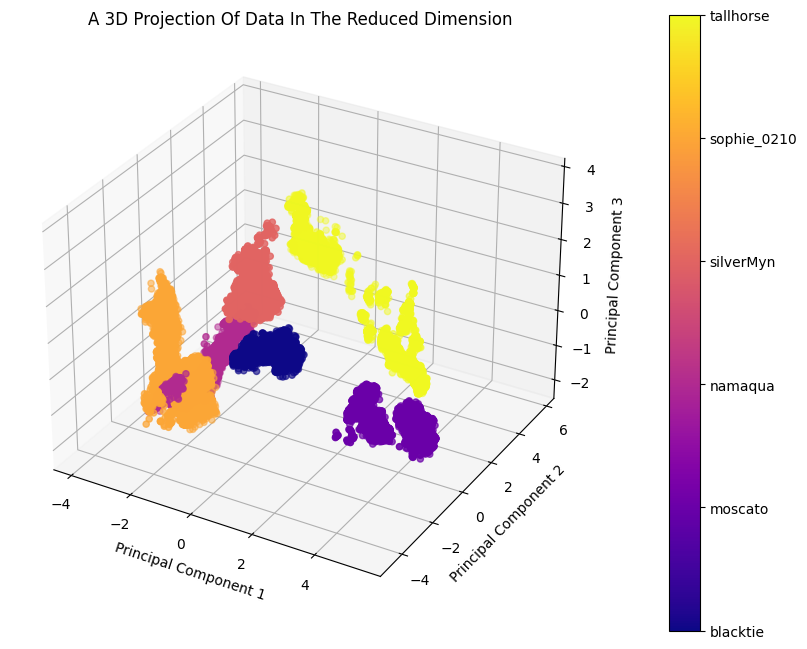

In [82]:
# Assuming PCA_df contains the principal components and the 'Target' column
x = PCA_df2["col1"]
y = PCA_df2["col2"]
z = PCA_df2["col3"]

# Encode 'Target' wine bottle names into numerical values for color mapping
label_encoder = LabelEncoder()
encoded_target = label_encoder.fit_transform(PCA_df2['Target'])  # Encode wine names into integers

# Create the 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection="3d")

# Scatter plot with different colors based on the 'Target' wine bottle name
scatter = ax.scatter(x, y, z, c=encoded_target, cmap='plasma', marker="o")

# Add a colorbar and set labels to the original wine names
cbar = fig.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_ticks(np.arange(len(label_encoder.classes_)))
cbar.set_ticklabels(label_encoder.classes_)  # Display wine names on the colorbar

# Set title and axis labels
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")

# Show the plot
plt.show()


Drop the second sophie before combining PCA datasets

In [83]:
# Drop the timestamp and 'Target' columns
PCA_df2 = PCA_df2[PCA_df2['Target'] != 'sophie_0210']

In [84]:
PCA_combined = pd.concat([PCA_df, PCA_df2], axis=0)

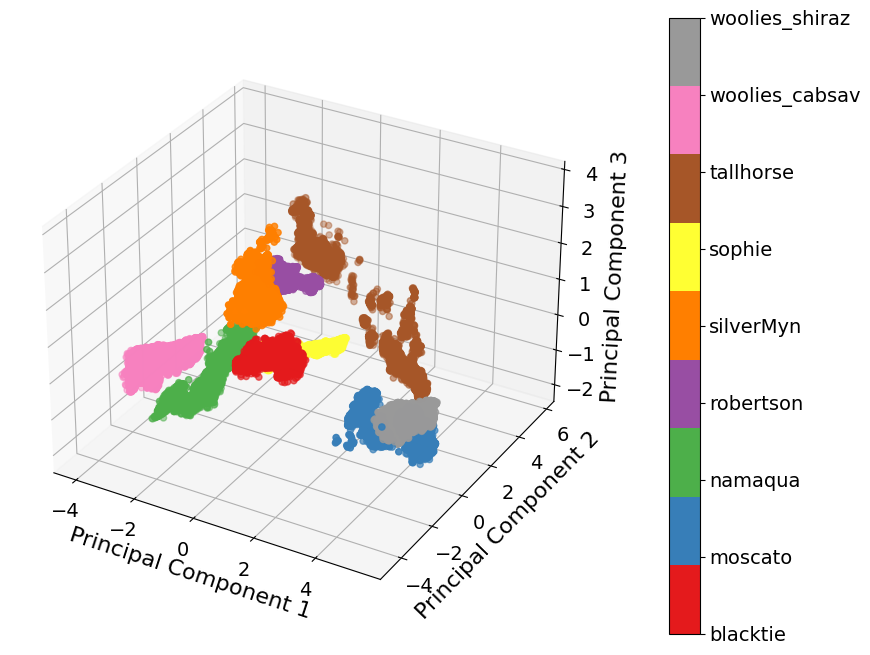

In [85]:
# Assuming PCA_df contains the principal components and the 'Target' column
x = PCA_combined["col1"]
y = PCA_combined["col2"]
z = PCA_combined["col3"]

# Encode 'Target' wine bottle names into numerical values for color mapping
label_encoder = LabelEncoder()
encoded_target = label_encoder.fit_transform(PCA_combined['Target'])  # Encode wine names into integers

# Create the 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection="3d")

# Scatter plot with different colors based on the 'Target' wine bottle name
scatter = ax.scatter(x, y, z, c=encoded_target, cmap='Set1', marker="o")

# Add a colorbar and set labels to the original wine names
cbar = fig.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_ticks(np.arange(len(label_encoder.classes_)))
cbar.set_ticklabels(label_encoder.classes_)  # Display wine names on the colorbar
cbar.ax.tick_params(labelsize=14)  # Increase colorbar tick label size

# Set title and axis labels with larger font size
# ax.set_title("A 3D Projection Of Data In The Reduced Dimension", fontsize=20)
ax.set_xlabel("Principal Component 1", fontsize=16)
ax.set_ylabel("Principal Component 2", fontsize=16)
ax.set_zlabel("Principal Component 3", fontsize=16)

# Increase tick label sizes for all axes
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)
ax.tick_params(axis='z', labelsize=14)

# Show the plot
plt.show()


In [86]:
df = PCA_combined

import pandas as pd
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.svm import SVC
# from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer, f1_score

# Assuming df is your scaled DataFrame
# Let's assume the target column is named 'target'
X = df.drop(columns=['Target'])
Y = df['Target']

# Initialize the SVM classifier
svm = SVC(kernel='linear')  # You can change the kernel to 'rbf' or others if needed

# Set up Stratified K-Fold cross-validation
skf = StratifiedKFold(n_splits=5)  # 5 folds, you can change it as per your requirement

# Perform cross-validation
scores = cross_val_score(svm, X, Y, cv=skf, scoring='accuracy')


# Compute F1 scores
f1_scorer = make_scorer(f1_score, average='weighted')  # 'weighted' handles imbalanced classes
f1_scores = cross_val_score(svm, X, Y, cv=skf, scoring=f1_scorer)

# Print the results
print("Accuracy scores for each fold: ", scores)
print("Mean accuracy: ", scores.mean())

print("\nF1 scores for each fold: ", f1_scores)
print("Mean F1 score: ", f1_scores.mean())

Accuracy scores for each fold:  [0.95387316 0.99899156 0.9941361  0.99749757 0.98774885]
Mean accuracy:  0.9864494490838235

F1 scores for each fold:  [0.95373324 0.99899138 0.99413731 0.99749794 0.98775837]
Mean F1 score:  0.9864236479378867


C:\Users\jessd\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


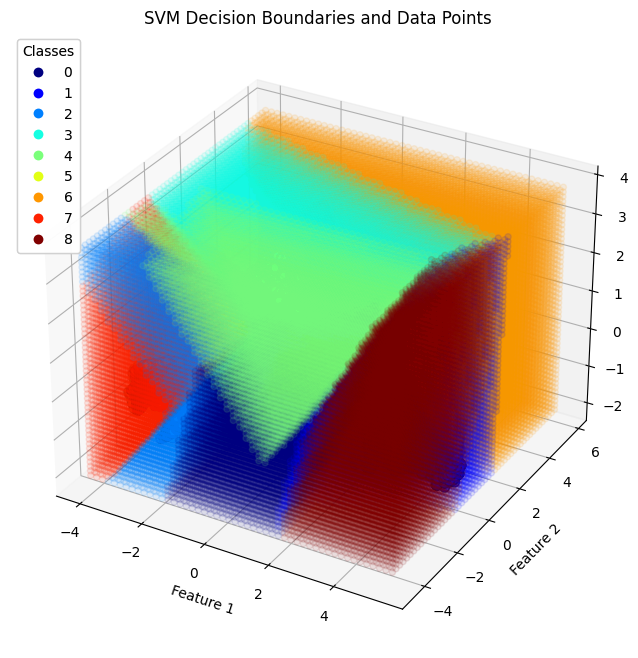

In [87]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import svm
from sklearn.preprocessing import LabelEncoder

# Assuming df is your PCA-transformed DataFrame
X = df.drop(columns=['Target'])
Y = df['Target']

# Encode target labels
le = LabelEncoder()
Y_encoded = le.fit_transform(Y)

# Fit the SVM model
clf = svm.SVC(kernel='linear', decision_function_shape='ovr')
clf.fit(X, Y_encoded)

# Create a grid to plot the decision boundaries
xx, yy, zz = np.meshgrid(
    np.linspace(X.iloc[:, 0].min(), X.iloc[:, 0].max(), 50),
    np.linspace(X.iloc[:, 1].min(), X.iloc[:, 1].max(), 50),
    np.linspace(X.iloc[:, 2].min(), X.iloc[:, 2].max(), 50)
)

# Predict on the grid
grid_points = np.c_[xx.ravel(), yy.ravel(), zz.ravel()]
predictions = clf.predict(grid_points)
predictions = predictions.reshape(xx.shape)

# Set up the 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Define a colormap
cmap = plt.get_cmap('jet', np.unique(predictions).size)

# Plot decision surface
ax.scatter(xx, yy, zz, c=predictions, alpha=0.1, cmap=cmap)

# Plot original data points
scatter = ax.scatter(X.iloc[:, 0], X.iloc[:, 1], X.iloc[:, 2], c=Y_encoded, s=50, edgecolor='k', cmap=cmap)

# Add legend
legend1 = ax.legend(*scatter.legend_elements(), title="Classes")
ax.add_artist(legend1)

# Set labels
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
ax.set_title('SVM Decision Boundaries and Data Points')

plt.show()


C:\Users\jessd\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


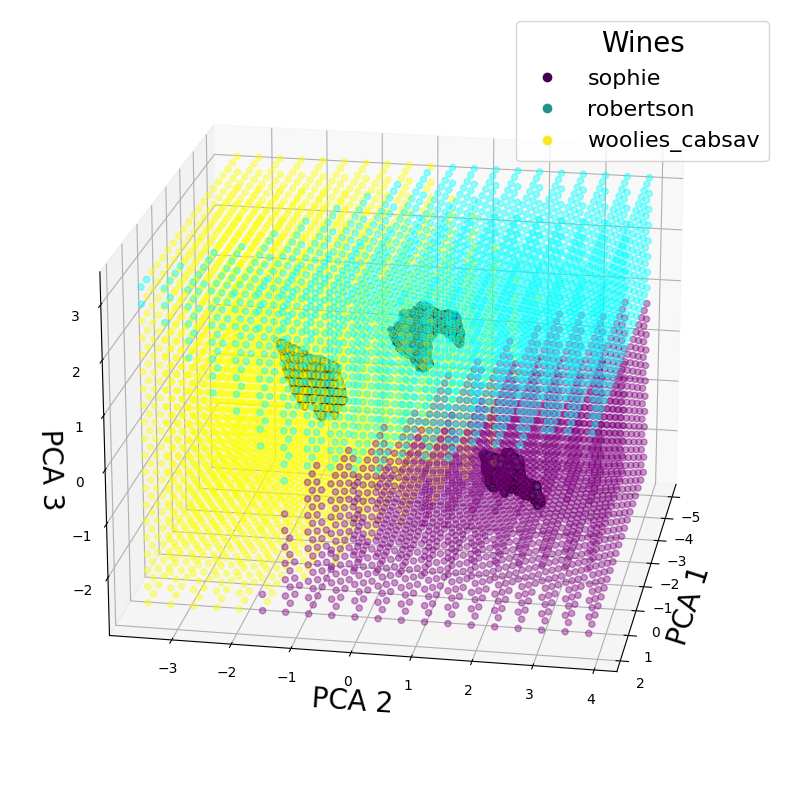

In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import make_scorer, f1_score

# Assuming df is your scaled DataFrame with PCA already done
df = PCA_combined

# Filter to include only three wine types (e.g., 'sophie', 'robertson', 'woolies_cabsav')
selected_wines = ['sophie', 'robertson', 'woolies_cabsav']
filtered_df = df[df['Target'].isin(selected_wines)]

# Prepare features and target
X = filtered_df.drop(columns=['Target'])
Y = filtered_df['Target']

# Initialize the SVM classifier
svm = SVC(kernel='linear')  # You can change the kernel to 'rbf' or others if needed

# Fit the model
svm.fit(X, Y)

# Create a meshgrid for 3D plotting
x_range = np.linspace(X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1, 20)
y_range = np.linspace(X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1, 20)
z_range = np.linspace(X.iloc[:, 2].min() - 1, X.iloc[:, 2].max() + 1, 20)

# Create a meshgrid for all three dimensions
xx, yy, zz = np.meshgrid(x_range, y_range, z_range)

# Create an array to hold grid points
grid_points = np.c_[xx.ravel(), yy.ravel(), zz.ravel()]

# Predict on the grid points
Z = svm.predict(grid_points)

# Reshape Z to match the meshgrid dimensions for contour plotting
Z = Z.reshape(xx.shape)

# Plotting
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Create a scatter plot of the data points
scatter = ax.scatter(X.iloc[:, 0], X.iloc[:, 1], X.iloc[:, 2],
                     c=Y.astype('category').cat.codes, cmap='viridis', edgecolor='k', label='Data Points')

# Plot decision boundaries with increased opacity
ax.scatter(xx[Z == 'sophie'], yy[Z == 'sophie'], zz[Z == 'sophie'], 
           color='purple', alpha=0.4, label='Decision Boundary for Sophie')  # Increased opacity
ax.scatter(xx[Z == 'robertson'], yy[Z == 'robertson'], zz[Z == 'robertson'], 
           color='cyan', alpha=0.4, label='Decision Boundary for Robertson')  # Increased opacity
ax.scatter(xx[Z == 'woolies_cabsav'], yy[Z == 'woolies_cabsav'], zz[Z == 'woolies_cabsav'], 
           color='yellow', alpha=0.4, label='Decision Boundary for Woolies CabSav')  # Increased opacity

# Add labels and title
ax.set_xlabel('PCA 1', fontsize=20)
ax.set_ylabel('PCA 2', fontsize=20)
ax.set_zlabel('PCA 3', fontsize=20)

# Adjust the view angle if needed to avoid cutoff
ax.view_init(elev=20, azim=10)  # You can modify these values to fit your preference

# Add a legend in the top left corner
handles, labels = scatter.legend_elements()
ax.legend(handles, selected_wines, title="Wines",title_fontsize=20, fontsize=16, loc='upper right')

plt.show()


# Optionally, evaluate the model with cross-validation
# skf = StratifiedKFold(n_splits=5)  # 5 folds, you can change it as per your requirement
# scores = cross_val_score(svm, X, Y, cv=skf, scoring='accuracy')
# f1_scorer = make_scorer(f1_score, average='weighted')
# f1_scores = cross_val_score(svm, X, Y, cv=skf, scoring=f1_scorer)

# # Print the results
# print("Accuracy scores for each fold: ", scores)
# print("Mean accuracy: ", scores.mean())
# print("\nF1 scores for each fold: ", f1_scores)
# print("Mean F1 score: ", f1_scores.mean())


# Feed Forward Neural Network

In [22]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score  # Import f1_score from sklearn
import numpy as np
import matplotlib.pyplot as plt  # Ensure matplotlib is imported for plotting

class Multiclass(nn.Module):
    def __init__(self, input_dim, hidden_dim=16, output_dim=6):
        super(Multiclass, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

class WineModelTrainer:
    def __init__(self, X, y, hidden_dim=64, num_epochs=1000):
        self.X = np.array(X)  # Ensure X is a NumPy array
        self.y = y
        self.hidden_dim = hidden_dim
        self.num_epochs = num_epochs
        self.label_encoder = LabelEncoder()
        self.model = None
        self.highest_train_accuracy = 0.0
        self.highest_test_accuracy = 0.0

    def preprocess_data(self):
        self.y_encoded = self.label_encoder.fit_transform(self.y)
        self.num_classes = len(np.unique(self.y_encoded))

    def initialize_model(self):
        input_dim = self.X.shape[1]
        self.model = Multiclass(input_dim=input_dim, hidden_dim=self.hidden_dim, output_dim=self.num_classes)

    def train(self):
        self.preprocess_data()
        criterion = nn.CrossEntropyLoss()
        optimizer = None  # Declare optimizer outside to avoid reusing it across folds

        kf = KFold(n_splits=5, shuffle=True, random_state=42)

        # Lists to store accuracies for plotting
        all_train_accuracies = []
        all_test_accuracies = []

        for fold, (train_idx, test_idx) in enumerate(kf.split(self.X)):
            X_train, X_test = self.X[train_idx], self.X[test_idx]
            y_train, y_test = self.y_encoded[train_idx], self.y_encoded[test_idx]

            # Scale the data
            scaler = StandardScaler()
            X_train_scaled = scaler.fit_transform(X_train)
            X_test_scaled = scaler.transform(X_test)

            X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
            X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
            y_train_tensor = torch.tensor(y_train, dtype=torch.long)
            y_test_tensor = torch.tensor(y_test, dtype=torch.long)

            # Reinitialize model and optimizer for each fold
            self.initialize_model()
            optimizer = optim.Adam(self.model.parameters(), lr=0.001)

            # Initialize lists for storing accuracies for each epoch
            train_accuracies = []
            test_accuracies = []

            for epoch in range(self.num_epochs):
                # Forward pass
                outputs = self.model(X_train_tensor)
                loss = criterion(outputs, y_train_tensor)

                # Backward pass and optimization
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

                # Calculate accuracy
                _, predicted_train = torch.max(outputs, 1)
                train_accuracy = (predicted_train == y_train_tensor).sum().item() / y_train_tensor.size(0)
                train_accuracies.append(train_accuracy)  # Store train accuracy

                with torch.no_grad():
                    outputs_test = self.model(X_test_tensor)
                    _, predicted_test = torch.max(outputs_test, 1)
                    test_accuracy = (predicted_test == y_test_tensor).sum().item() / y_test_tensor.size(0)
                    test_accuracies.append(test_accuracy)  # Store test accuracy

                self.highest_train_accuracy = max(self.highest_train_accuracy, train_accuracy)
                self.highest_test_accuracy = max(self.highest_test_accuracy, test_accuracy)

            # Compute F1 score
            f1 = f1_score(y_test_tensor.numpy(), predicted_test.numpy(), average='weighted')

            print(f"Fold {fold + 1}, Train Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}, F1 Score: {f1:.4f}")

            # Store the accuracies of the last fold for plotting
            all_train_accuracies.append(train_accuracies)
            all_test_accuracies.append(test_accuracies)

        print(f"Highest Train Accuracy: {self.highest_train_accuracy:.4f}")
        print(f"Highest Test Accuracy: {self.highest_test_accuracy:.4f}")

        # Plotting the accuracies
        plt.figure(figsize=(12, 6))
        for i in range(len(all_train_accuracies)):
            plt.plot(all_train_accuracies[i], label=f'Train Accuracy Fold {i + 1}', alpha=0.7)
            plt.plot(all_test_accuracies[i], label=f'Test Accuracy Fold {i + 1}', linestyle='--', alpha=0.7)
        plt.xlabel('Epoch', fontsize=20)
        plt.ylabel('Accuracy', fontsize=20)
        plt.legend(fontsize=16)
        plt.tick_params(axis='both', labelsize=16)  # Adjusts font size of x and y axis ticks
        plt.grid()
        plt.show()



Fold 1, Train Accuracy: 0.9392, Test Accuracy: 0.9431, F1 Score: 0.9420
Fold 2, Train Accuracy: 0.9683, Test Accuracy: 0.9703, F1 Score: 0.9703
Fold 3, Train Accuracy: 0.8706, Test Accuracy: 0.8764, F1 Score: 0.8605
Fold 4, Train Accuracy: 0.9693, Test Accuracy: 0.9684, F1 Score: 0.9684
Fold 5, Train Accuracy: 0.9493, Test Accuracy: 0.9517, F1 Score: 0.9516
Highest Train Accuracy: 0.9693
Highest Test Accuracy: 0.9703


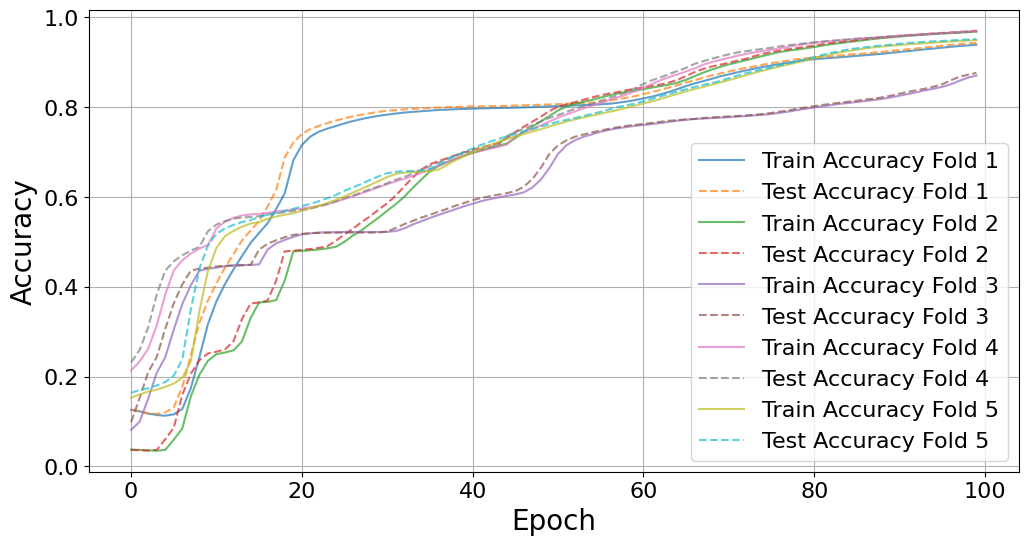

In [23]:
trainer = WineModelTrainer(X, Y,64,100)
trainer.train()